##### 출처: https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html

# 2.1 데이터 전처리 기초

--------------------------------------

* missingno 패키지: 결측 데이터 검색

pandas 데이터프레임에서 결측 데이터(NaN)를 찾는 기능을 제공

In [56]:
from io import StringIO # 문자열의 파일화
import pandas as pd

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [4]:
df.isnull().sum() # 각 열별로 결측치 총 갯수 확인

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

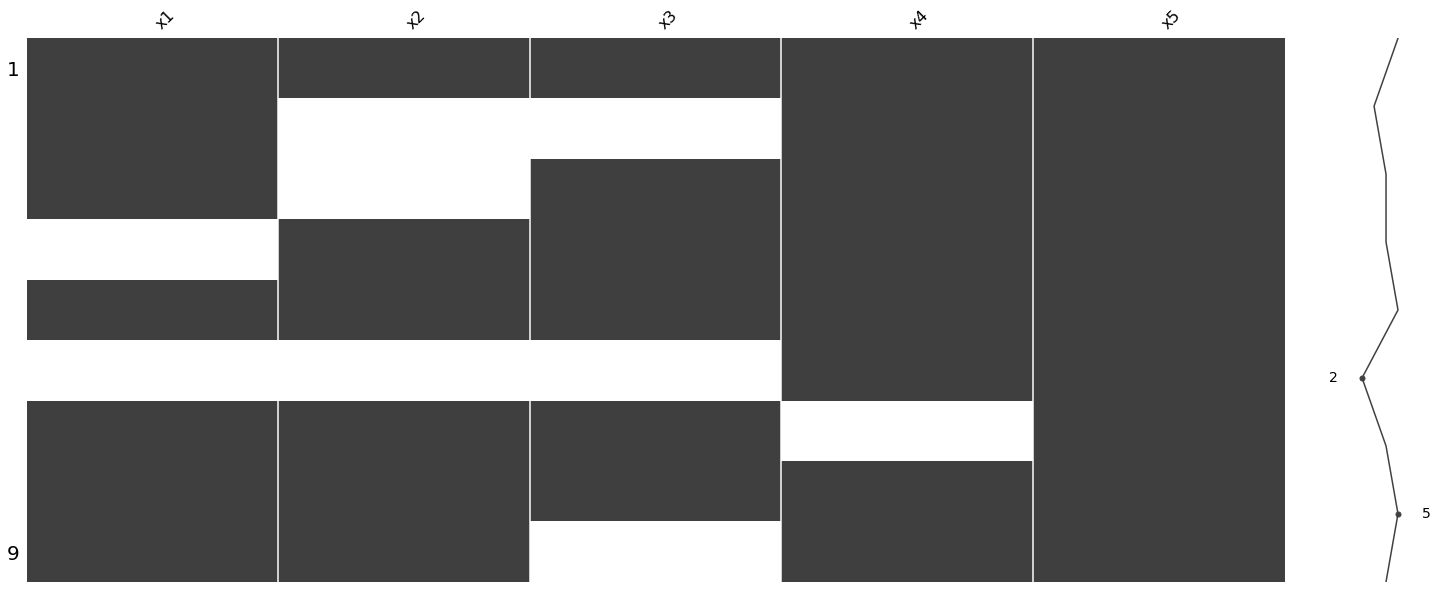

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df) #결측된 데이터를 흰색으로 표현 우측의 스파크 라인은 각 행의 완성도를 보여준다.
plt.show()

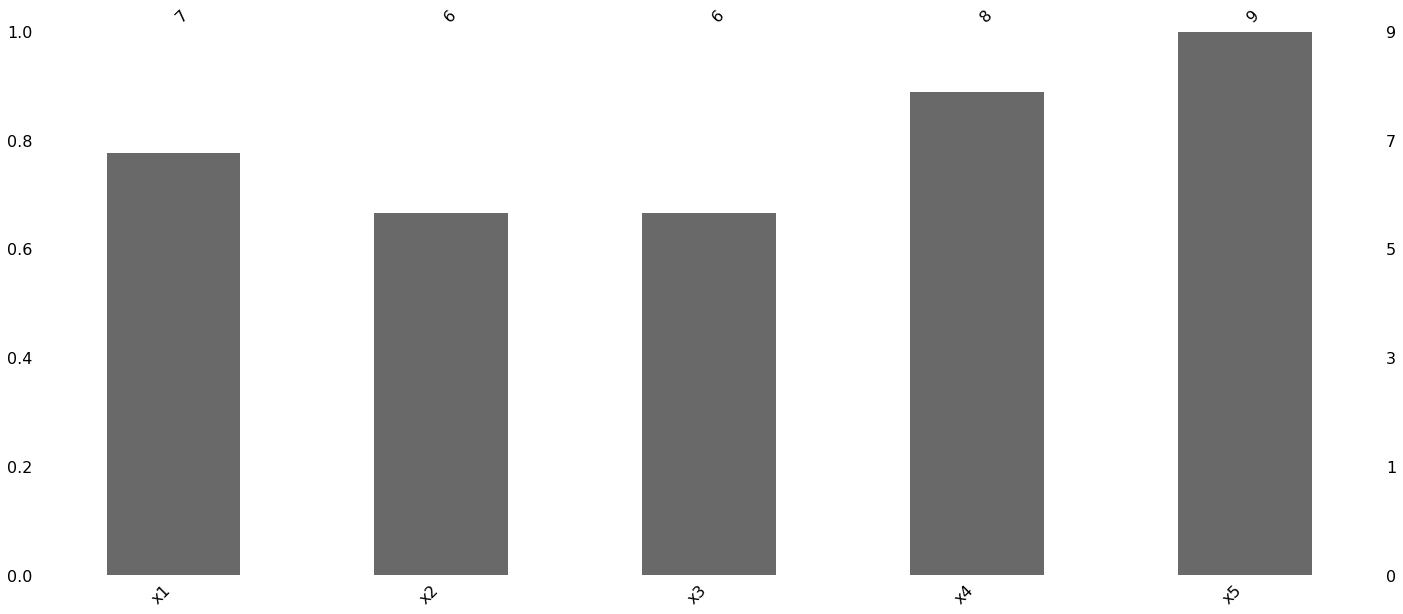

In [8]:
msno.bar(df) # 열별로 비율을 보여준다.
plt.show()

In [10]:
df.dropna(thresh=7, axis=1) #결측치가 7개 이상인 열 삭제

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


* 결측 데이터 대체 (simple_imputer가 에러나서 바꿈)

In [68]:
from sklearn.base import TransformerMixin
import numpy as np

class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """
        object와 날짜 형식은 최빈값을 나머지는 평균값 대체
        """
        
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype in [np.dtype('<M8[ns]'),np.dtype('O')] else X[c].mean() for c in X],index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [66]:
xt = DataFrameImputer().fit_transform(df)
xt

,x1,x2,x3,x4,x5
0,1,0.100000,1.000000,2019-01-01,A
1,2,0.566667,4.666667,2019-01-02,B
2,3,0.566667,3.000000,2019-01-03,C
3,5,0.400000,4.000000,2019-01-04,A
4,5,0.500000,5.000000,2019-01-05,B
5,5,0.566667,4.666667,2019-01-06,C
6,7,0.700000,7.000000,2019-01-02,A
7,8,0.800000,8.000000,2019-01-08,B
8,9,0.900000,4.666667,2019-01-09,C


* sklearn.preprocessing 패키지: 전처리

In [69]:
X = np.arange(7).reshape(-1, 1)  
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # sklearn.preprocessing엔 다양한 scaler가 있다. 주로 사용하는 건 minmax,robust 등
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

# 2.2 범주형 데이터 처리

----------------

In [76]:
from patsy import dmatrix

df1 = pd.DataFrame(["Male", "Female"], columns=["x"])
dmatrix("x + 0", df1) # 0안 붙이면 상수항 추가되니 주의

DesignMatrix with shape (2, 2)
  x[Female]  x[Male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [77]:
df3 = pd.DataFrame([1, 2, 3, 4], columns=["x"]) 
dmatrix("C(x) + 0", df3) # 정수형인경우 c로 범주형 변수임을 표시해 준다.

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)